In [37]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dropout # Import Dropout
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
df=pd.read_csv("/content/meal_recommendation_dataset (1).csv")
df

,Age,Weight,Height,Protein,Calories,BMI,Meal_Type,Day_Meal
0,56,59,178,98.56,2318.39,18.62,Veg,Morning: Upma | Afternoon: Palak Paneer with R...
1,36,55,172,76.74,2000.45,18.59,Non-Veg,Morning: Scrambled Eggs | Afternoon: Fish Fry ...
2,39,68,151,106.60,1854.81,29.82,Non-Veg,Morning: Chicken Sandwich | Afternoon: Egg Cur...
3,38,56,182,88.93,1608.48,16.91,Veg,Morning: Poha | Afternoon: Rajma Chawal | Even...
4,44,60,177,58.62,1708.73,19.15,Non-Veg,Morning: Scrambled Eggs | Afternoon: Fish Fry ...
...,...,...,...,...,...,...,...,...
9995,31,51,188,97.33,2508.09,14.43,Veg,Morning: Dhokla | Afternoon: Lauki Curry with ...
9996,32,83,175,68.55,1830.49,27.10,Veg,Morning: Dhokla | Afternoon: Lauki Curry with ...
9997,21,64,166,42.19,2147.03,23.23,Veg,Morning: Upma | Afternoon: Palak Paneer with R...
9998,19,98,187,85.85,2666.92,28.02,Non-Veg,Morning: Chicken Sandwich | Afternoon: Egg Cur...


In [39]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder objects
le_day = LabelEncoder()
le_meal = LabelEncoder()

# Apply to each column
df['Day_meal_encoded'] = le_day.fit_transform(df['Day_Meal'])
df['Meal_type_encoded'] = le_meal.fit_transform(df['Meal_Type'])


In [40]:
df.drop(['Day_Meal','Meal_Type'],axis=1,inplace=True)

In [41]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [43]:
from tensorflow.keras.utils import to_categorical

y_encoded = to_categorical(y)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                10000 non-null  int64  
 1   Weight             10000 non-null  int64  
 2   Height             10000 non-null  int64  
 3   Protein            10000 non-null  float64
 4   Calories           10000 non-null  float64
 5   BMI                10000 non-null  float64
 6   Day_meal_encoded   10000 non-null  int64  
 7   Meal_type_encoded  10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [45]:
df.describe()

,Age,Weight,Height,Protein,Calories,BMI,Day_meal_encoded,Meal_type_encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.334800,71.959500,169.529300,80.449922,2196.270038,25.392422,4.486200,0.485600
std,12.173255,15.924567,11.488661,23.121078,345.085497,6.666750,2.884934,0.499818
min,18.000000,45.000000,150.000000,40.000000,1600.010000,12.600000,0.000000,0.000000
25%,28.000000,58.000000,160.000000,60.390000,1895.525000,20.150000,2.000000,0.000000
50%,38.000000,72.000000,170.000000,80.745000,2197.140000,24.850000,4.500000,0.000000
75%,49.000000,86.000000,179.000000,100.732500,2491.582500,29.970000,7.000000,1.000000
max,59.000000,99.000000,189.000000,119.990000,2799.710000,44.000000,9.000000,1.000000


In [46]:
df.shape

(10000, 8)

In [47]:
x

,Age,Weight,Height,Protein,Calories,BMI,Day_meal_encoded
0,56,59,178,98.56,2318.39,18.62,9
1,36,55,172,76.74,2000.45,18.59,8
2,39,68,151,106.60,1854.81,29.82,1
3,38,56,182,88.93,1608.48,16.91,7
4,44,60,177,58.62,1708.73,19.15,8
...,...,...,...,...,...,...,...
9995,31,51,188,97.33,2508.09,14.43,2
9996,32,83,175,68.55,1830.49,27.10,2
9997,21,64,166,42.19,2147.03,23.23,9
9998,19,98,187,85.85,2666.92,28.02,1


In [48]:
y

,Meal_type_encoded
0,1
1,0
2,0
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [51]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [52]:
x_train_scaled.shape

(7000, 7)

In [53]:
x_test_scaled.shape

(3000, 7)

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [55]:
le=LabelEncoder()

In [56]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [57]:
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [58]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
y_train_encoded = ohe.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_encoded = ohe.transform(y_test_encoded.reshape(-1, 1))

In [59]:
x_train_scaled = x_train_scaled[:y_train_encoded.shape[0], :]

In [60]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
history=model.fit(x_train_scaled, y_train_encoded, epochs=50, batch_size=32)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.3064e-08
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.3889e-08
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.3557e-08
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.5031e-09
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.7702e-09
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.2767e-09
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.3221e-09
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.4979e-09
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.9636e-09
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.2777e-09
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.7560e-09
Epoch 12

In [72]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(x_test_scaled)
y_pred_labels = np.argmax(y_predict, axis=1)
y_true_labels = np.argmax(y_test_encoded, axis=1)
y_pred_labels = y_pred_labels[:len(y_true_labels)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [73]:
accuracy = accuracy_score(le.inverse_transform(y_true_labels), le.inverse_transform(y_pred_labels))
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [74]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

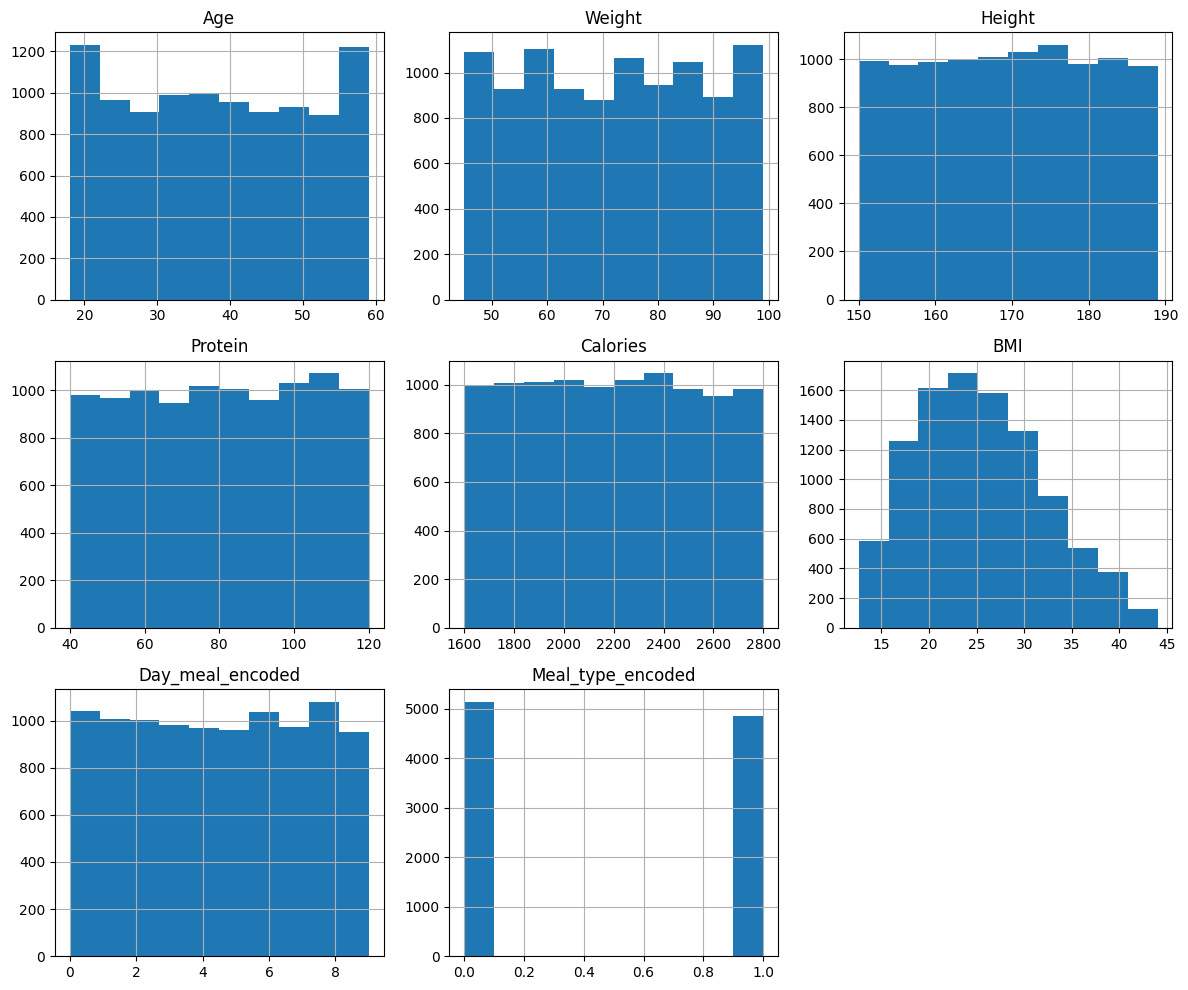

In [67]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

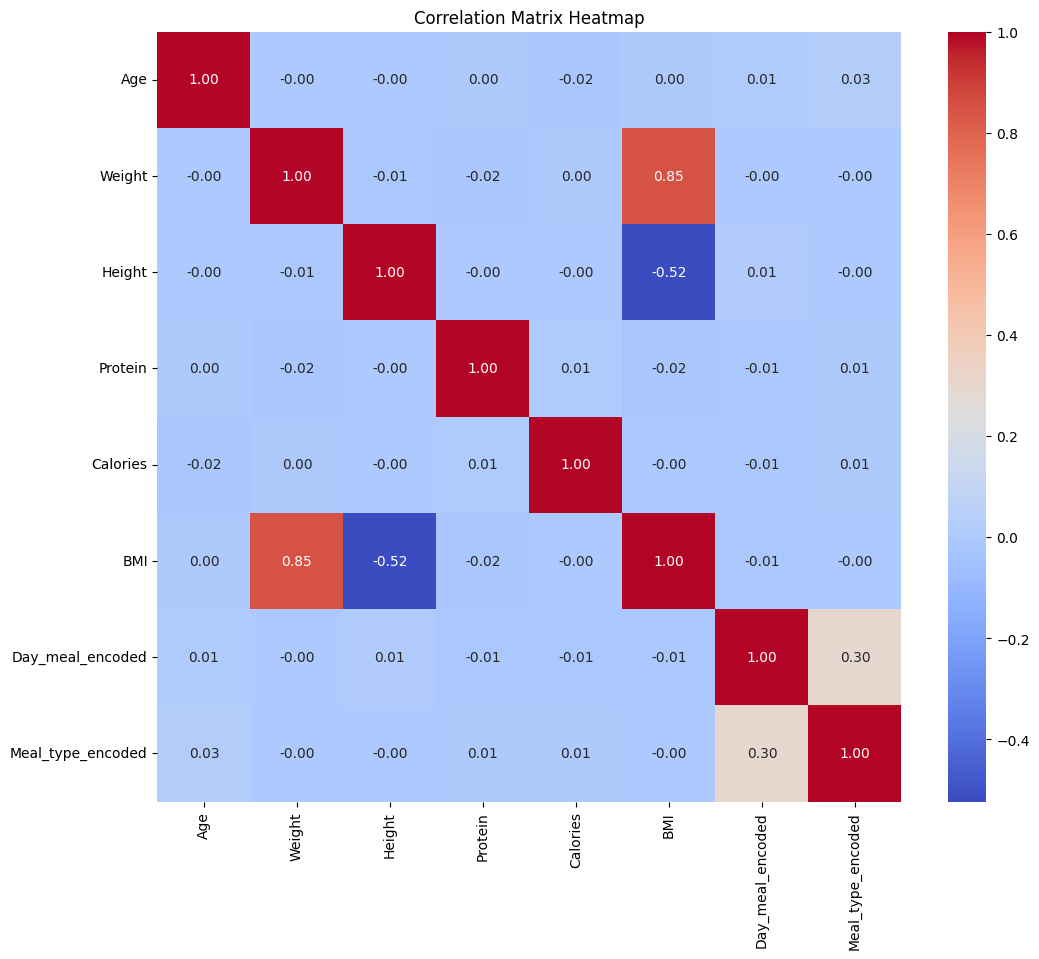

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Calculate the correlation matrix only on numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [68]:
# Assuming prediction outputs
predicted_day = le_day.inverse_transform([1])         # Example output: ['Tuesday']
predicted_meal = le_meal.inverse_transform([2])       # Example output: ['Lunch']

# For full column (e.g., from DataFrame)
df['Predicted_day_meal'] = le_day.inverse_transform(df['Predicted_day_encoded'])
df['Predicted_meal_type'] = le_meal.inverse_transform(df['Predicted_meal_encoded'])


In [76]:
import pickle

# Save the model to a file
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

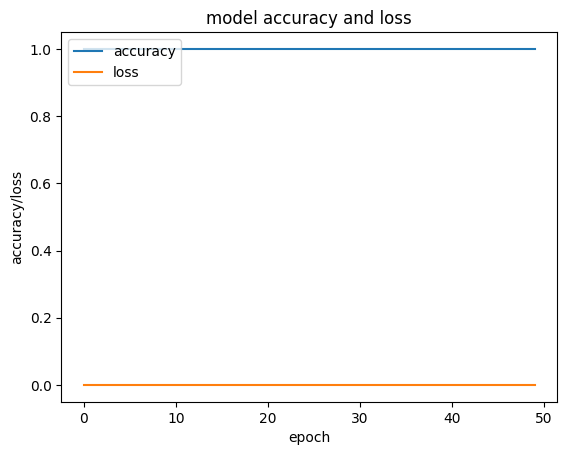

In [75]:
# prompt: accuracy vs loss graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()
